In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/kaggle/input/bigot-benjamin-2-notebook-exploration-012025/customers_features.csv")

In [3]:
df.describe()

,recency,frequency,monetary,avg_review_score,total_items
count,94983.000000,94983.000000,94983.000000,94983.000000,94983.000000
mean,286.960761,1.033869,165.666772,4.114041,1.413495
std,152.981551,0.210834,226.726478,1.316138,2.374000
min,44.000000,1.000000,9.590000,1.000000,1.000000
25%,163.000000,1.000000,63.100000,4.000000,1.000000
50%,268.000000,1.000000,107.900000,5.000000,1.000000
75%,396.000000,1.000000,182.930000,5.000000,1.000000
max,772.000000,16.000000,13664.080000,5.000000,231.000000


In [4]:
df.isna().sum()

customer_unique_id    0
recency               0
frequency             0
monetary              0
avg_review_score      0
total_items           0
dtype: int64

In [5]:
df = df.fillna(0)

In [6]:
df_rfm = df[['recency', 'frequency', 'monetary']]

df_rfm.head()

,recency,frequency,monetary
0,160,1,141.90
1,163,1,27.19
2,585,1,86.22
3,369,1,43.62
4,336,1,196.89


**Normalisation des données**

In [7]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(df_rfm)

**Simulation K-Means**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

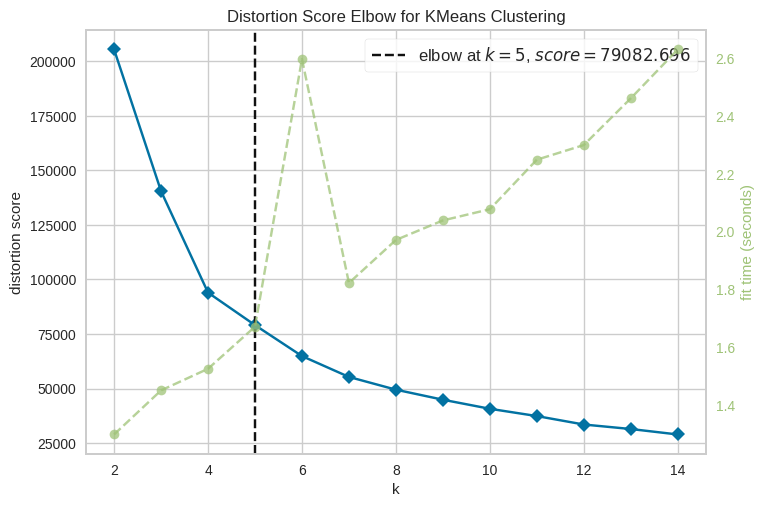

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), metric='distortion')
elbow_visualizer.fit(rfm_scaled)
elbow_visualizer.show()

In [9]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

cluster_centers = kmeans.cluster_centers_
print("Centres des clusters :")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centres des clusters :
[[-0.71698937 -0.16064485 -0.13755527]
 [ 0.98304411 -0.16064485 -0.1410562 ]
 [-0.1099766   5.12513221  0.54377324]
 [ 0.01250475 -0.09981159  4.3719032 ]]


<ipython-input-9-aefcd7d35a33>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rfm['cluster'] = kmeans.fit_predict(rfm_scaled)


In [10]:
cluster_summary = df_rfm.groupby('cluster')[['recency', 'frequency', 'monetary']].mean()

cluster_summary['cluster_size'] = df_rfm['cluster'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,cluster_size
cluster,,,,
0,177.273829,1.000000,134.459520,51660
1,437.345555,1.000000,133.642793,37965
2,270.136459,2.114416,288.953915,2858
3,289.021600,1.012800,1155.907716,2500


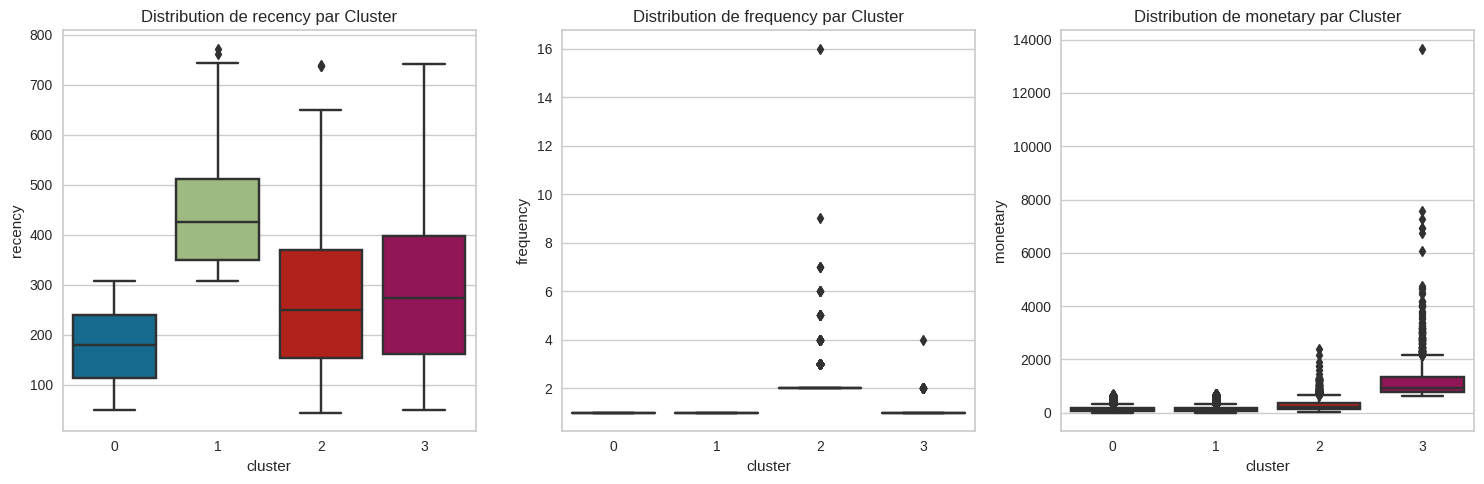

In [11]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['recency', 'frequency', 'monetary']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_rfm)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

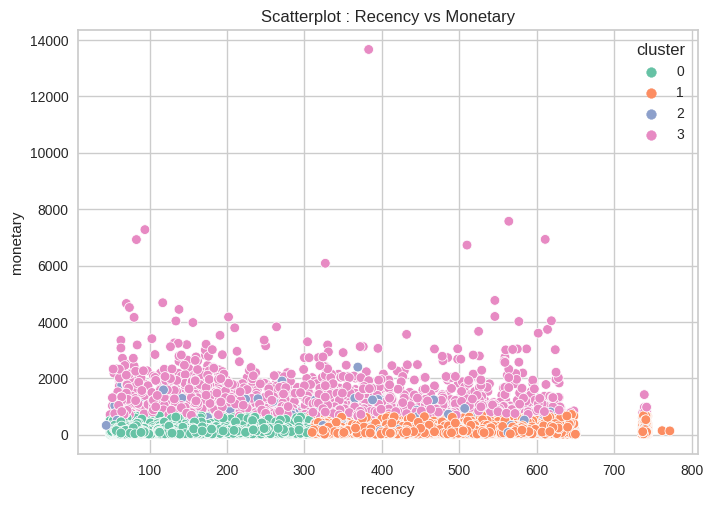

In [12]:
sns.scatterplot(data=df_rfm, x='recency', y='monetary', hue='cluster', palette='Set2')
plt.title("Scatterplot : Recency vs Monetary")
plt.show()

In [13]:
clusters = kmeans.fit_predict(rfm_scaled)
score = silhouette_score(rfm_scaled, clusters)
print(f"Score de silhouette : {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score de silhouette : 0.488


**Ajout de ReviewScore**

In [14]:
df_rfm_review = df[['recency', 'frequency', 'monetary', 'avg_review_score']]

In [15]:
df_rfm_review.isna().sum()

recency             0
frequency           0
monetary            0
avg_review_score    0
dtype: int64

In [16]:
df_rfm_review = df_rfm_review.fillna(0)

In [17]:
features = ['recency', 'frequency', 'monetary', 'avg_review_score']

scaler = StandardScaler()
rfm_review_scaled = scaler.fit_transform(df_rfm_review[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

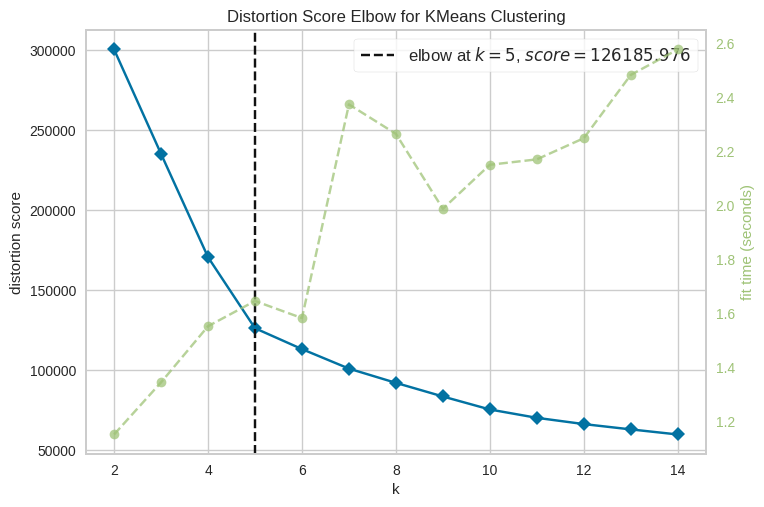

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
kmeans = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(kmeans, k=(2, 15), metric='distortion')
elbow_visualizer.fit(rfm_review_scaled)
elbow_visualizer.show()

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_rfm_review['cluster'] = kmeans.fit_predict(rfm_review_scaled)

cluster_centers = kmeans.cluster_centers_
print("Centres des clusters :")
print(cluster_centers)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centres des clusters :
[[-1.01274672e-03 -1.60644850e-01 -5.93905556e-02 -1.88088112e+00]
 [-1.24673691e-02 -8.74983575e-02  4.77937653e+00 -6.00424392e-02]
 [-1.09976600e-01  5.12513221e+00  5.43773243e-01  5.25065489e-02]
 [-7.57455243e-01 -1.60644850e-01 -1.44545717e-01  4.26042994e-01]
 [ 1.01380801e+00 -1.60644850e-01 -1.39223093e-01  3.90824563e-01]]


In [20]:
cluster_summary = df_rfm_review.groupby('cluster')[features].mean()

cluster_summary['cluster_size'] = df_rfm_review['cluster'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,avg_review_score,cluster_size
cluster,,,,,
0,286.805819,1.000000,152.168100,1.638471,16155
1,285.343104,1.015377,1247.732225,4.036358,2081
2,270.136459,2.114416,288.953915,4.183146,2858
3,171.079993,1.000000,132.867991,4.674754,42091
4,442.048840,1.000000,134.044396,4.628413,31798


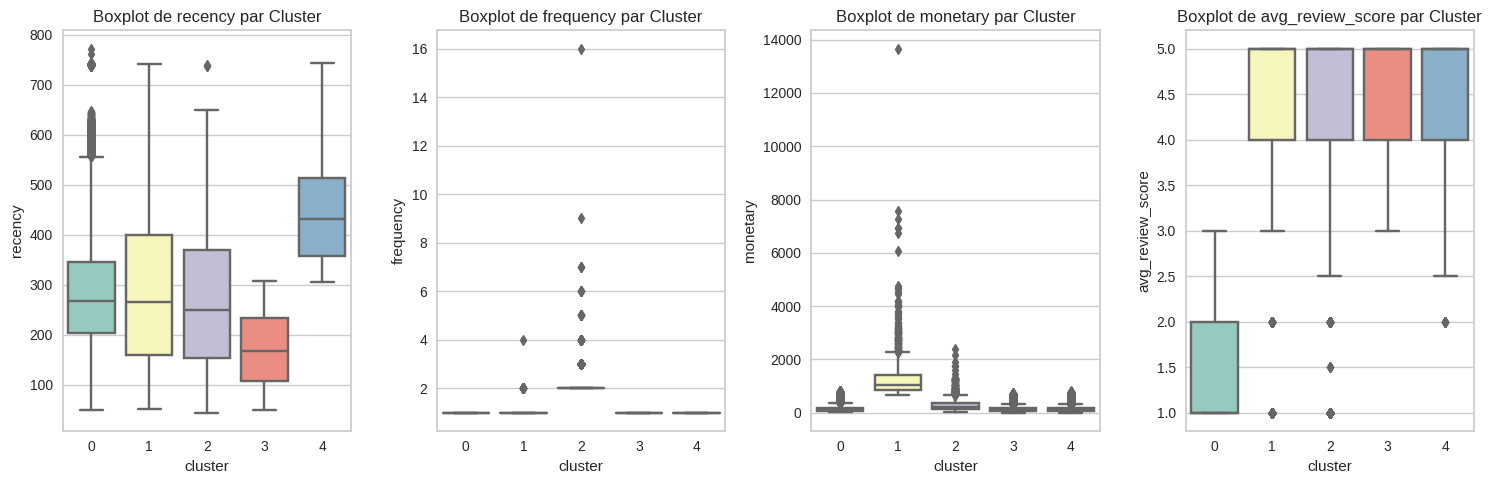

In [21]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='cluster', y=feature, data=df_rfm_review, palette='Set3')
    plt.title(f"Boxplot de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [22]:
clusters = kmeans.fit_predict(rfm_review_scaled)
score = silhouette_score(rfm_review_scaled, clusters)
print(f"Score de silhouette : {score:.3f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Score de silhouette : 0.417


**DBScan**

In [23]:
eps_values = [0.3, 0.5, 0.7, 1.0]
min_samples = 10
results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(rfm_review_scaled)

    n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
    n_noise = np.sum(clusters == -1)

    if n_clusters > 1:
        score = silhouette_score(rfm_review_scaled, clusters)
    else:
        score = -1

    results.append((eps, n_clusters, n_noise, score))

# Affichage des résultats
for eps, n_clusters, n_noise, score in results:
    print(f"eps: {eps}, nombre de clusters: {n_clusters}, points bruit: {n_noise}, score de silhouette: {score:.3f}")

eps: 0.3, nombre de clusters: 25, points bruit: 1544, score de silhouette: 0.077
eps: 0.5, nombre de clusters: 12, points bruit: 666, score de silhouette: 0.282
eps: 0.7, nombre de clusters: 5, points bruit: 390, score de silhouette: 0.616
eps: 1.0, nombre de clusters: 5, points bruit: 158, score de silhouette: 0.617


In [24]:
cluster_summary = df_rfm_review.groupby('cluster')[features].mean()

cluster_summary['cluster_size'] = df_rfm_review['cluster'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,avg_review_score,cluster_size
cluster,,,,,
0,286.805819,1.000000,152.168100,1.638471,16155
1,285.343104,1.015377,1247.732225,4.036358,2081
2,270.136459,2.114416,288.953915,4.183146,2858
3,171.079993,1.000000,132.867991,4.674754,42091
4,442.048840,1.000000,134.044396,4.628413,31798


**Agglomerative Clustering**

In [25]:
for freq in df_rfm['frequency'].unique():
    count = df_rfm[df_rfm['frequency'] == freq].shape[0]
    if count == 1:
        df_rfm = pd.concat([df_rfm, df_rfm[df_rfm['frequency'] == freq]], ignore_index=True)

In [26]:
df_rfm['frequency'].value_counts()

frequency
1     92095
2      2652
3       188
4        29
5         9
6         5
7         3
9         2
16        2
Name: count, dtype: int64

In [27]:
stratified_sample, _ = train_test_split(
    df_rfm,
    test_size=0.6,
    stratify=df_rfm['frequency'],
    random_state=42
)

In [28]:
scaler = StandardScaler()
rfm_scaled_sample = scaler.fit_transform(stratified_sample)

In [29]:
agglomerative = AgglomerativeClustering(n_clusters=4)
clusters = agglomerative.fit_predict(rfm_scaled_sample)
stratified_sample['clusters_agg'] = clusters

In [30]:
features = ['recency', 'frequency', 'monetary']

cluster_summary = stratified_sample.groupby('clusters_agg')[features].mean()

cluster_summary['cluster_size'] = stratified_sample['clusters_agg'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,cluster_size
clusters_agg,,,,
0,288.265734,1.001998,1138.760969,1001
1,271.610919,2.123050,290.953735,1154
2,437.612121,1.000000,133.592005,15131
3,177.896272,1.000000,133.450228,20708


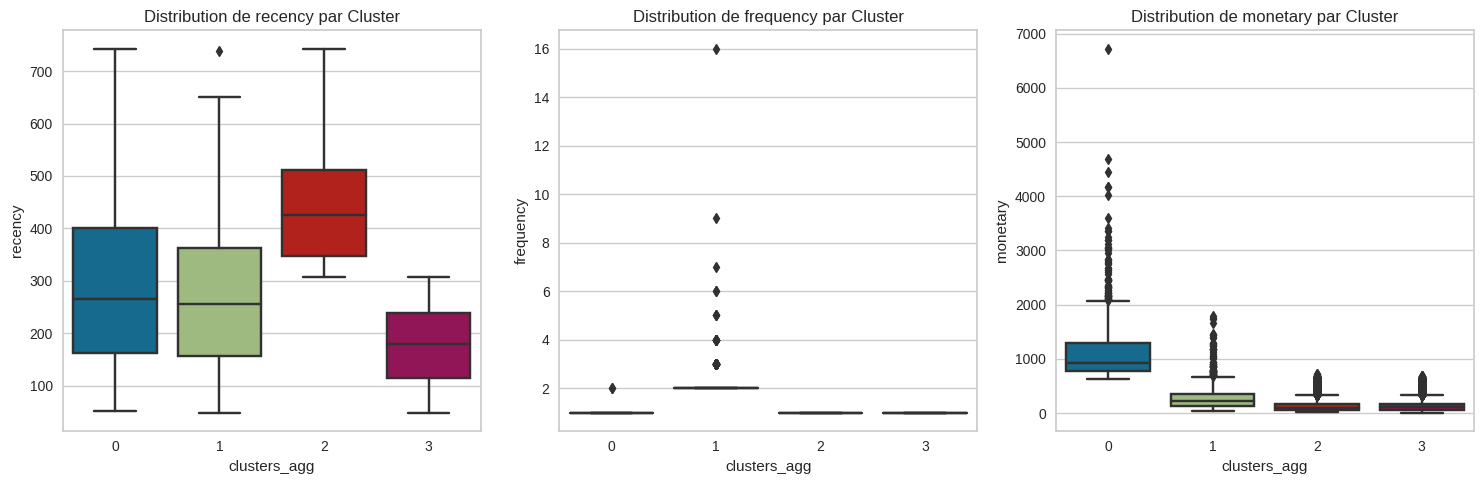

In [31]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['recency', 'frequency', 'monetary']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='clusters_agg', y=feature, data=stratified_sample)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [32]:
score = silhouette_score(rfm_scaled_sample, clusters)
print(f"Score de silhouette : {score:.3f}")

Score de silhouette : 0.622


In [33]:
for freq in df_rfm_review['frequency'].unique():
    count = df_rfm_review[df_rfm_review['frequency'] == freq].shape[0]
    if count == 1:
        df_rfm_review = pd.concat([df_rfm_review, df_rfm_review[df_rfm_review['frequency'] == freq]], ignore_index=True)

stratified_sample_review, _ = train_test_split(
    df_rfm_review,
    test_size=0.6,
    stratify=df_rfm_review['frequency'],
    random_state=42
)

scaler = StandardScaler()
rfm_scaled_review_sample = scaler.fit_transform(stratified_sample_review)

In [34]:
agglomerative = AgglomerativeClustering(n_clusters=5)
clusters = agglomerative.fit_predict(rfm_scaled_review_sample)
stratified_sample_review['clusters_agg'] = clusters

features = ['recency', 'frequency', 'monetary', 'avg_review_score']

cluster_summary = stratified_sample_review.groupby('clusters_agg')[features].mean()

cluster_summary['cluster_size'] = stratified_sample_review['clusters_agg'].value_counts()

display(cluster_summary)

,recency,frequency,monetary,avg_review_score,cluster_size
clusters_agg,,,,,
0,425.575129,1.000000,154.832298,4.634000,13397
1,285.685912,1.027714,1223.307136,4.021683,866
2,272.027385,2.125442,271.373012,4.182977,1132
3,172.861843,1.000000,115.652831,4.675962,16141
4,288.083927,1.000000,147.554881,1.637349,6458


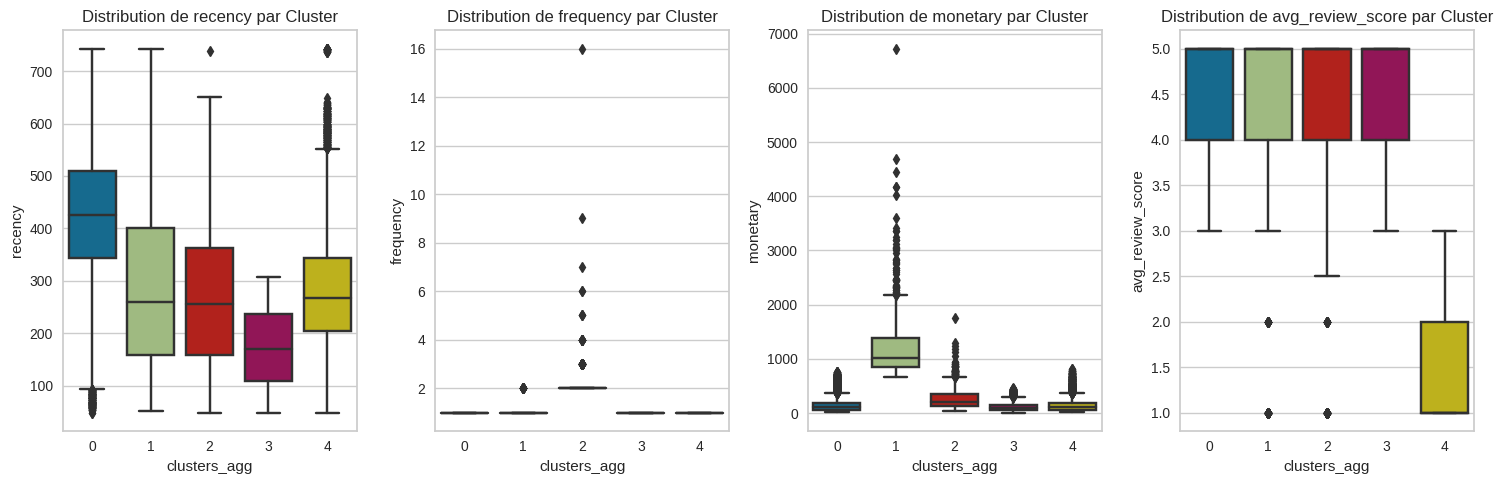

In [35]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(x='clusters_agg', y=feature, data=stratified_sample_review)
    plt.title(f"Distribution de {feature} par Cluster")
plt.tight_layout()
plt.show()

In [36]:
score = silhouette_score(rfm_scaled_review_sample, clusters)
print(f"Score de silhouette : {score:.3f}")

Score de silhouette : 0.472
